# Practical 6 : Data Clustering

### Problem: Cluster wholesale customer data into groups (customer segmentation).

The required data file is:
1. **Wholesale.csv** 

This dataset has been modfied from http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

The dataset contains variables from wholesale business.

#### Feature Description: They are the number that related to each type of orders. 
1. Channel: channel of purchase
2. Region: customer's region
3. Fresh: annual spending on fresh products
4. Milk: annual spending on milk products
5. Grocery: annual spending on grocery products
6. Frozen: annual spending on fresh products
7. Detergents_Paper: annual spending on detergents and paper  products
8. Delicassen: annual spending on delicatessen products


### 1. Read data from ‘Wholesale.csv’

In [1]:
import pandas as pd
df = pd.read_csv('Wholesale.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Online,C,12669,9656,7561,214,2674,1338
1,Online,C,7057,9810,9568,1762,3293,1776
2,Online,C,6353,8808,7684,2405,3516,7844
3,InStore,C,13265,1196,4221,6404,507,1788
4,Online,C,22615,5410,7198,3915,1777,5185


### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

#### 2.1 How many records and columns this data set has?

In [2]:
df.shape

(440, 8)

#### 2.2 What is the data type of each feature?

In [8]:
# Display data types of each column
df.dtypes

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

#### 2.3 Data Cleaning:
Is there any missing value? If so, fix them.

In [7]:
# Check missing values
# Count of null values in each column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### 2.4 Feature Engineering: 
Is this dataset mixed-type data?, If so, transform all categorical to numeric. See examples in Practical 5.

In [11]:
numeric_data = df.select_dtypes(include='number') # get all numberic attribues
nominal_data = df.select_dtypes(exclude='number') # get all nominal/ordinal attributes

In [12]:
numeric_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [13]:
nominal_data.head()

,Channel,Region
0,Online,C
1,Online,C
2,Online,C
3,InStore,C
4,Online,C


In [14]:
# one-hot encoding for nominal attributes
# create dummy features via one-hot encoding approach using pandas
nominal_data = pd.get_dummies(nominal_data)
nominal_data

,Channel_InStore,Channel_Online,Region_A,Region_B,Region_C
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
435,1,0,0,0,1
436,1,0,0,0,1
437,0,1,0,0,1
438,1,0,0,0,1


In [15]:
# Combine nominal and numeric features
df = pd.concat([nominal_data, numeric_data], axis=1, sort=False)
df

,Channel_InStore,Channel_Online,Region_A,Region_B,Region_C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1,0,0,1,12669,9656,7561,214,2674,1338
1,0,1,0,0,1,7057,9810,9568,1762,3293,1776
2,0,1,0,0,1,6353,8808,7684,2405,3516,7844
3,1,0,0,0,1,13265,1196,4221,6404,507,1788
4,0,1,0,0,1,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...,...,...
435,1,0,0,0,1,29703,12051,16027,13135,182,2204
436,1,0,0,0,1,39228,1431,764,4510,93,2346
437,0,1,0,0,1,14531,15488,30243,437,14841,1867
438,1,0,0,0,1,10290,1981,2232,1038,168,2125


#### 2.5 Should this dataset be normalized? If so, perform the normalization on this dataset. 

In [16]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns) 
X

,Channel_InStore,Channel_Online,Region_A,Region_B,Region_C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.0,0.0,0.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.0,1.0,0.0,0.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.0,1.0,0.0,0.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1.0,0.0,0.0,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.0,1.0,0.0,0.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...,...,...,...
435,1.0,0.0,0.0,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,1.0,0.0,0.0,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.0,1.0,0.0,0.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,1.0,0.0,0.0,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


### 3.	Cluster the Wholesale data using K-means with k=2 and then report the accuracies (SSE and Silhouette Coefficient).

In [17]:
# K=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
cluster_labels = kmeans.fit_predict(X)
sse = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
print("Sum of Squared Error (SSE): ", sse)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, cluster_labels)
print("Silhouette Score: ", silhouette)

Sum of Squared Error (SSE):  213.39898477020841
Silhouette Score:  0.5683105632788533


In [18]:
# K=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
cluster_labels = kmeans.fit_predict(X)
sse = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
print("Sum of Squared Error (SSE): ", sse)
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, cluster_labels)
print("Silhouette Score: ", silhouette)

Sum of Squared Error (SSE):  117.07252399254901
Silhouette Score:  0.6758522994678243


### 4.	What is the optimum (best) k value for the K-means model of this dataset? 

Using Elbow method, the optimal number of clusters can be found.

In [19]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 11) # for 1 to 10 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters = k)

    # Fit model to samples
    kmeans.fit(X)

    # Append the inertia to the list of inertias
    sse.append(kmeans.inertia_)

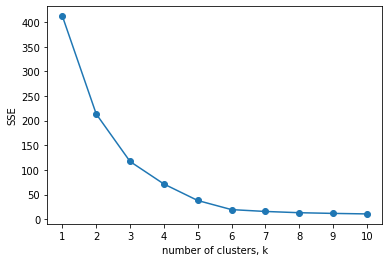

In [20]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

###### From the graph that k=5 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

### 5.	Create an optimum K-means model with the optimal k value.

Use the optimal k value from the previos section to create a model and assign cluster label for each data sample (use .fit_predict)

In [21]:
#Applying kmeans to the dataset with the optimal k value
k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label starts from 0
result.head()

,Channel_InStore,Channel_Online,Region_A,Region_B,Region_C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterLabels
0,0,1,0,0,1,12669,9656,7561,214,2674,1338,0
1,0,1,0,0,1,7057,9810,9568,1762,3293,1776,0
2,0,1,0,0,1,6353,8808,7684,2405,3516,7844,0
3,1,0,0,0,1,13265,1196,4221,6404,507,1788,1
4,0,1,0,0,1,22615,5410,7198,3915,1777,5185,0


#### 5.1 What is SSE of the optimal model?

In [22]:
# Sum of Squared Error of the oprimum model
sse = kmeans.inertia_
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  37.92243771816282


#### 5.2 What is Silhouette Coefficient of the optimal model?

In [23]:
silhouette = silhouette_score(X, y_kmeans)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.8139267553776266


#### 5.3 How many members for each cluster?

In [24]:
# Number of members in each cluster
result.ClusterLabels.value_counts()

1    211
0    105
2     59
4     37
3     28
Name: ClusterLabels, dtype: int64

#### 5.4 What are centroid data?

In [25]:
# Centriod for each cluster
print("Centroid data:")
centriods_data = mms.inverse_transform(kmeans.cluster_centers_)
centriods_data = pd.DataFrame(centriods_data,columns=col_names)
centriods_data

Centroid data:


,Channel_InStore,Channel_Online,Region_A,Region_B,Region_C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-5.551115e-16,1.000000e+00,-1.942890e-16,4.163336e-17,1.000000e+00,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
1,1.000000e+00,-2.775558e-16,-3.608225e-16,-8.326673e-17,1.000000e+00,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
2,1.000000e+00,2.775558e-16,1.000000e+00,-1.387779e-17,-2.220446e-16,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
3,1.000000e+00,2.775558e-16,8.326673e-17,1.000000e+00,-1.110223e-16,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857
4,-3.330669e-16,1.000000e+00,4.864865e-01,5.135135e-01,-1.110223e-16,6273.135135,9965.864865,17370.135135,2048.243243,8320.270270,1546.918919


In [26]:
centriods_data.to_csv('Wholesale_centriods_data.csv', index=False)

#### 5.5 Describe the characteristics of each cluster.

- cluster 0 >> In-store customers, live in Region C, spend a lot on Fresh and not a lot on Detergents_Paper products
- cluster 1 >>  Online customers, live in Region C, spend a lot on Grocery and not a lot on Delicassen products
- cluster 2 >> In-store customers, live in Region A, spend a lot on Fresh and not a lot on Detergents_Paper products
- cluster 3 >> In-store customers, live in Region B, spend a lot on Fresh and not a lot on Delicassen products
- cluster 4 >> Online customers, live in Region A and B, spend a lot on Grocery and not a lot on Delicassen products

#### 5.6 Based on the characteristics of each cluster, give 1 example of sales strategies. 

ANSWER: Pair promotion between Fresh and Detergents_Paper products to increase sale volume for Detergents_Paper products for customers in cluster#0

### 6.	Save data together with its cluster label into file named ‘Wholesale_clusters.csv’

In [ ]:
result.to_csv('Wholesale_clusters.csv')